In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pathlib

In [6]:
import pandas as pd

In [3]:
csvpath = pathlib.Path("/run/media/vincenzo/HDATA/CovellaScript/multinode/newds_data")
csvlist = csvpath.glob("*.csv")

csvlist = sorted(csvlist, key=lambda x: int(x.stem.split('_')[0][1:]))

In [4]:
keys = ['healthy', 'memeater','memleak', 'membw', 'cpuoccupy','cachecopy','iometadata','iobandwidth']

# COMPUTE NODES FAULTS HISTOGRAMS

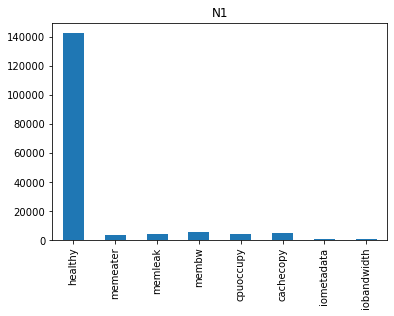

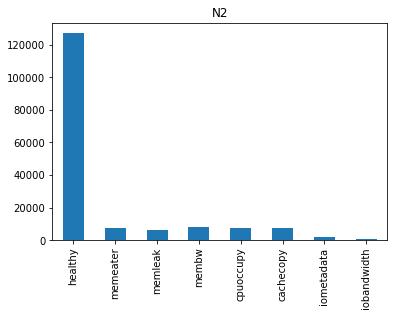

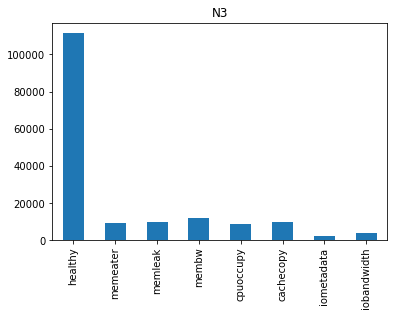

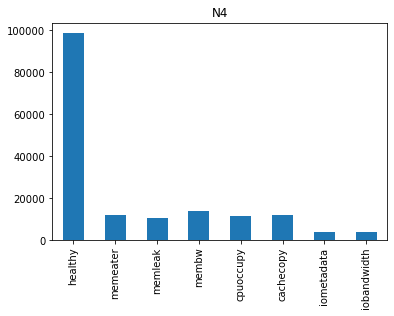

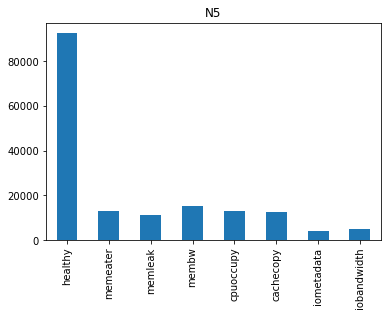

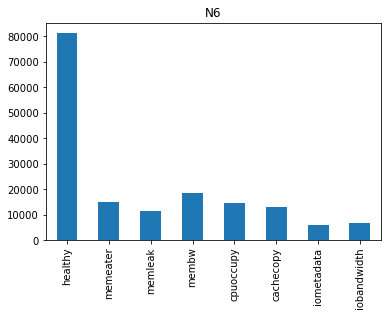

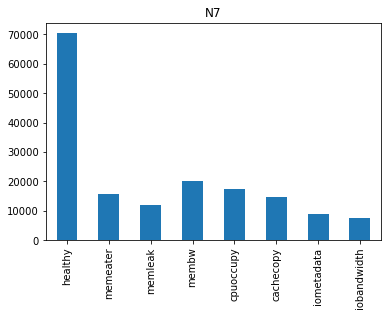

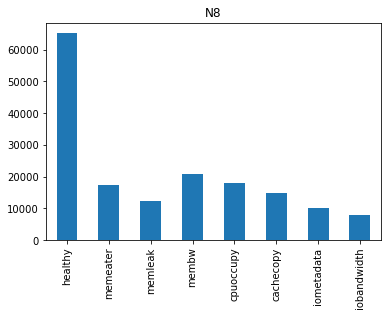

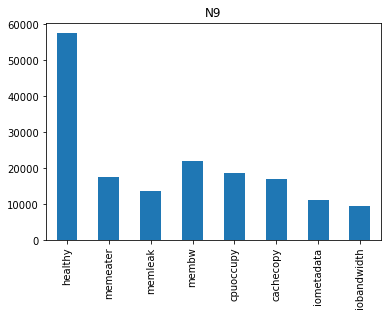

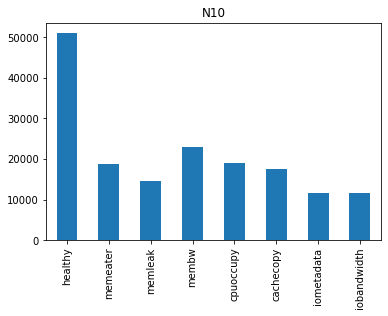

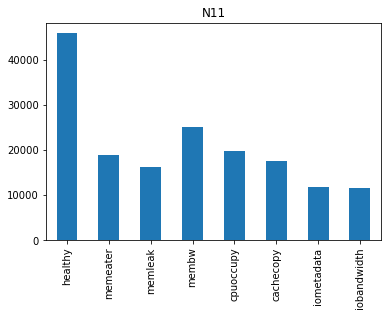

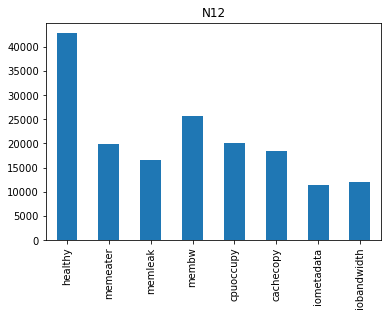

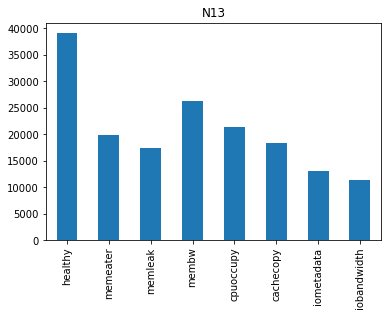

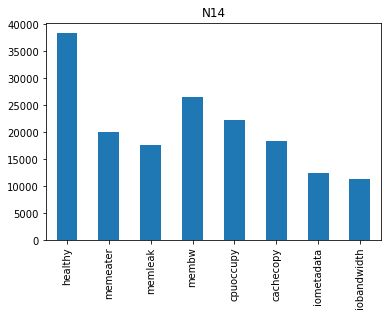

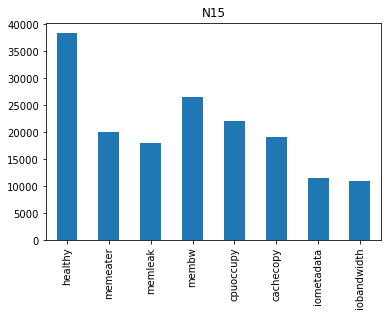

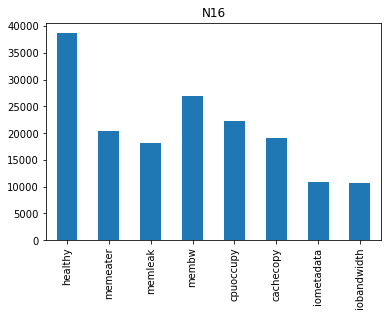

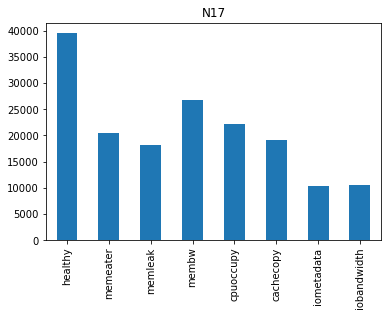

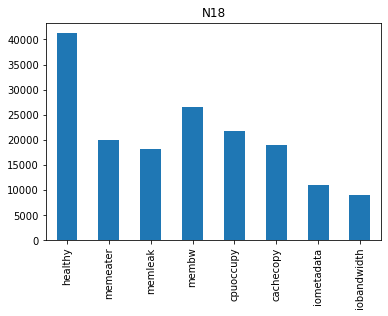

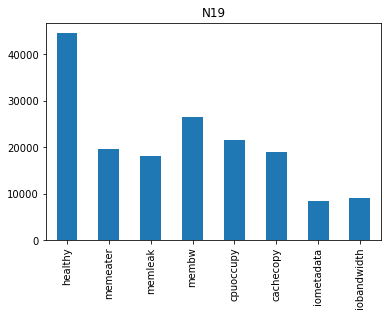

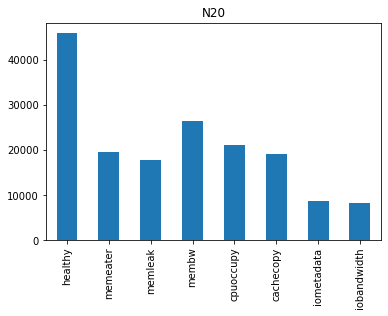

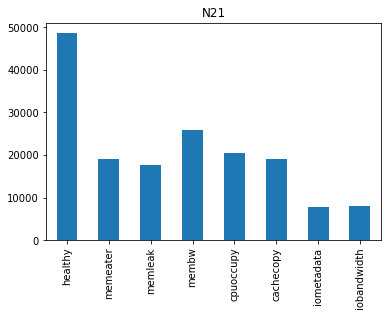

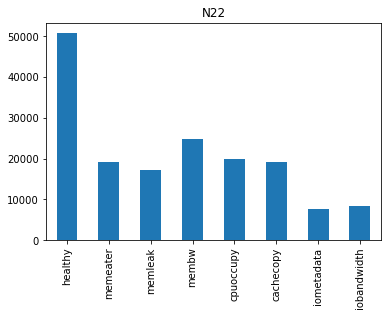

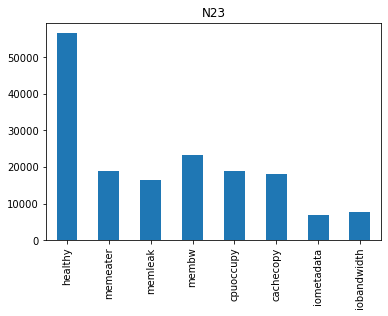

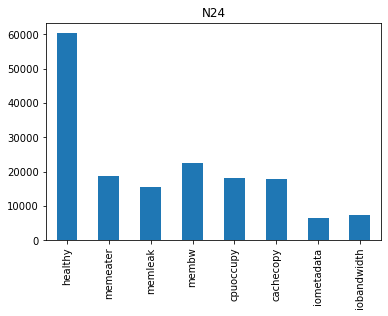

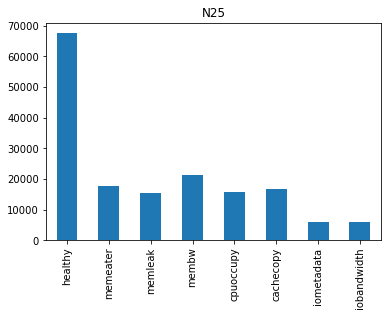

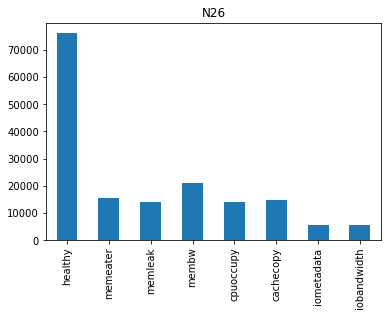

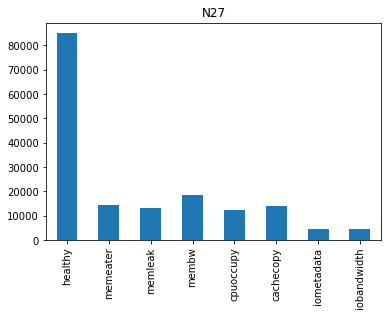

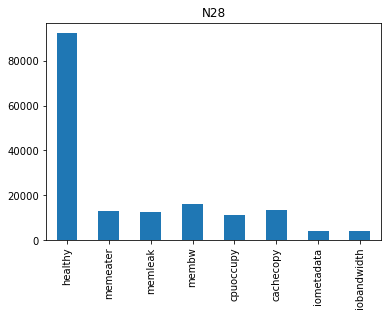

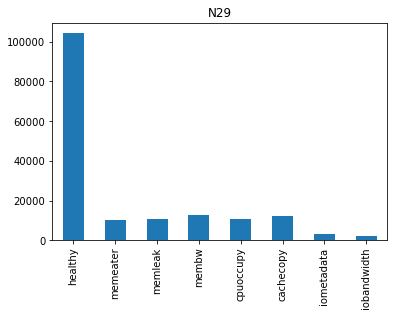

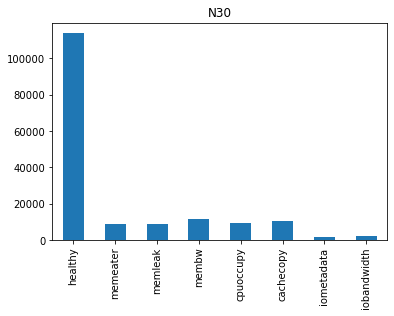

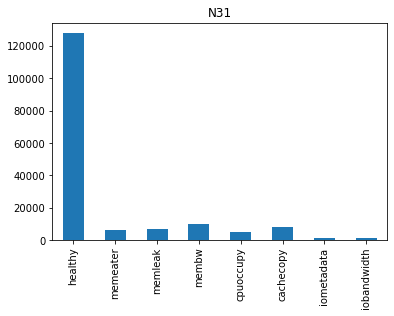

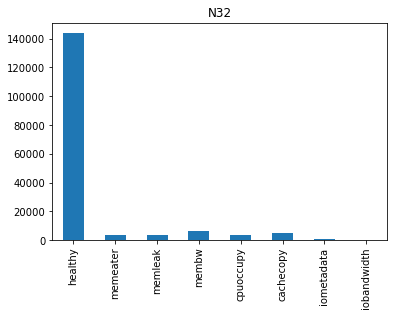

In [8]:
for file_entry in csvlist:
    df = pd.read_csv(file_entry, header=0, index_col=0, parse_dates=True)
    ax = df['faultLabel'].value_counts(sort=False).sort_index().plot( kind="bar")
    ax.set_xticklabels(keys)
    ax.set_title(file_entry.stem)
    plt.show()

## Compute nodes faults count

In [9]:
for file_entry in csvlist:
    df = pd.read_csv(file_entry, header=0, index_col=0, parse_dates=True)
    count = df['faultLabel'].value_counts(sort=False).sort_index()
    count.index = keys
    print(file_entry.stem)
    print(count)
    print("##############")

N1
healthy        142554
memeater         3863
memleak          4456
membw            5494
cpuoccupy        4204
cachecopy        4624
iometadata        923
iobandwidth       610
Name: faultLabel, dtype: int64
##############
N2
healthy        127104
memeater         7282
memleak          6342
membw            8177
cpuoccupy        7607
cachecopy        7308
iometadata       1991
iobandwidth       917
Name: faultLabel, dtype: int64
##############
N3
healthy        111524
memeater         9353
memleak          9599
membw           11800
cpuoccupy        8622
cachecopy        9813
iometadata       2318
iobandwidth      3699
Name: faultLabel, dtype: int64
##############
N4
healthy        98740
memeater       12208
memleak        10751
membw          13687
cpuoccupy      11528
cachecopy      11980
iometadata      3742
iobandwidth     4092
Name: faultLabel, dtype: int64
##############
N5
healthy        92558
memeater       12936
memleak        11393
membw          15442
cpuoccupy      13115


In [10]:
featpath = pathlib.Path("/run/media/vincenzo/HDATA/CovellaScript/multinode/newds_fvectors_mode")
featlist = featpath.glob("*.csv")

featlist = sorted(featlist, key=lambda x: int(x.stem.split('_')[0][1:]))

# FEATURE VECTORS FAULTS HISTOGRAMS (MODE LABELING STRATEGY)

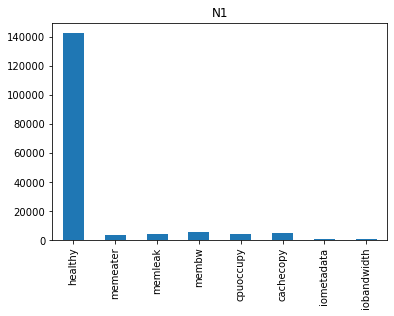

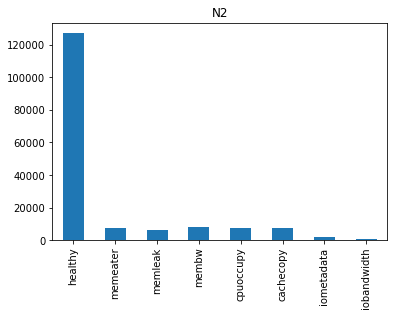

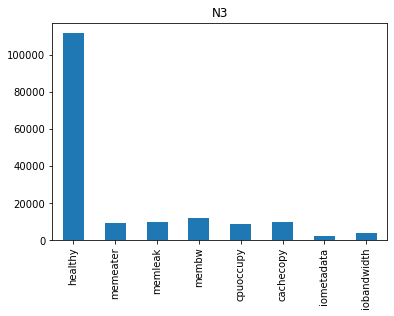

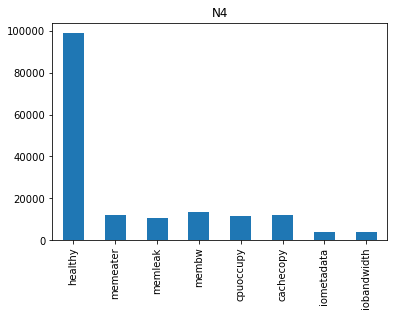

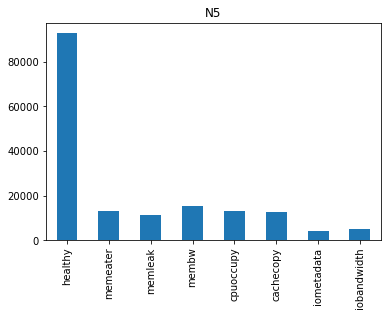

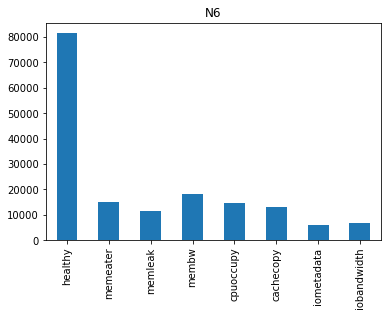

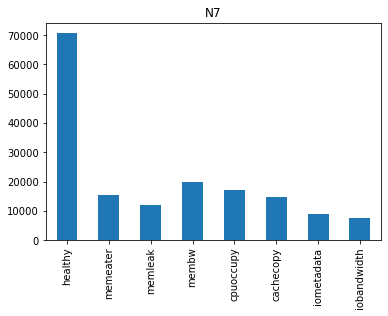

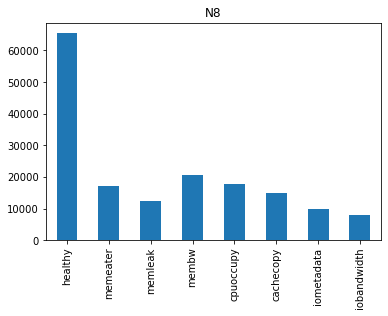

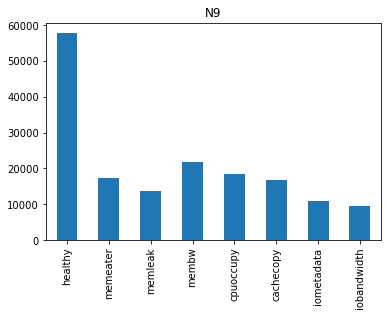

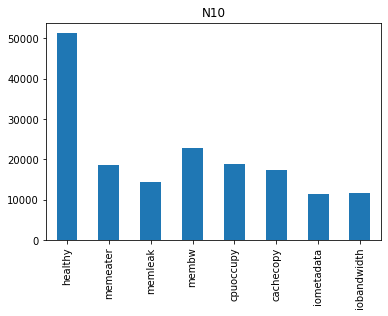

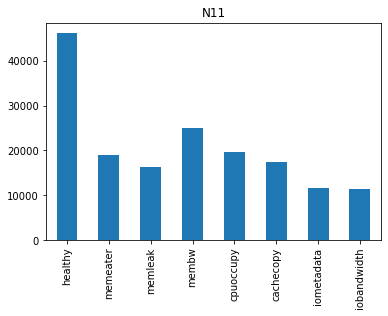

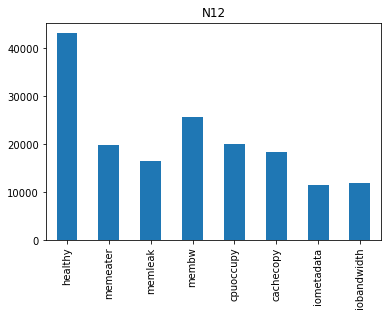

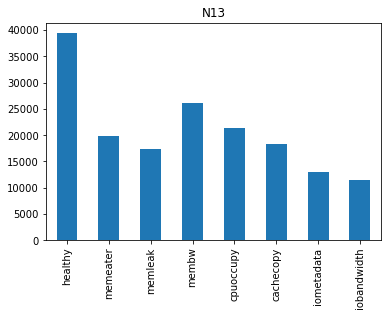

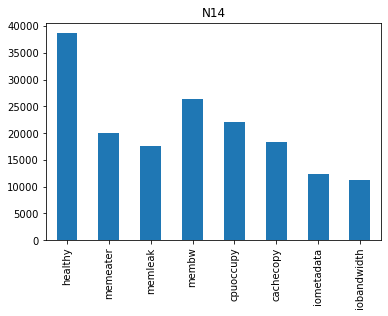

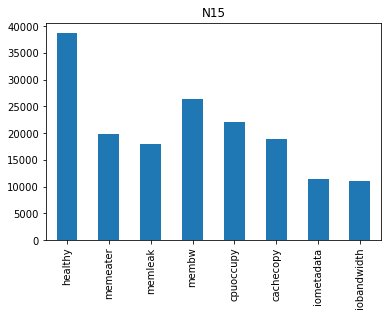

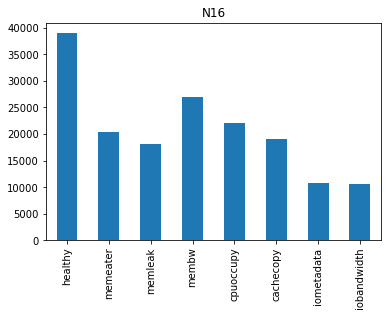

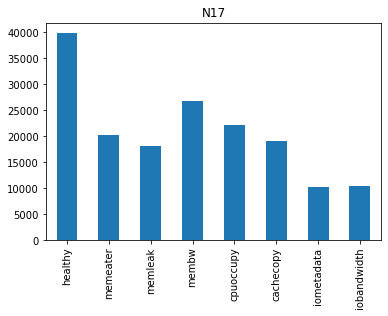

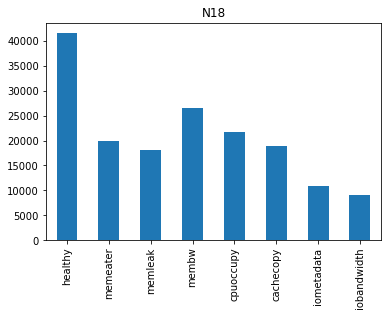

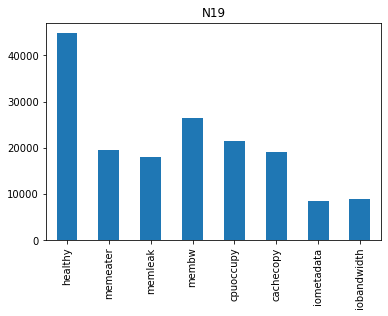

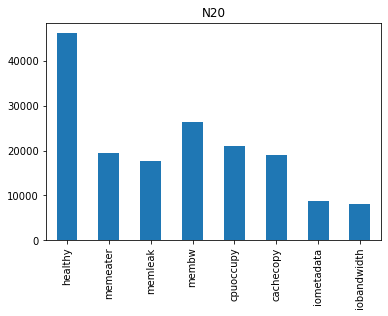

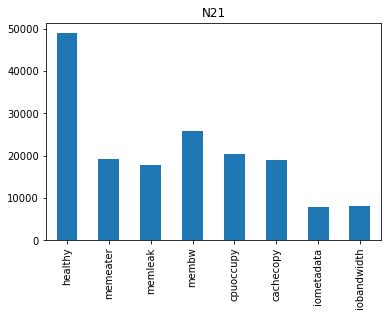

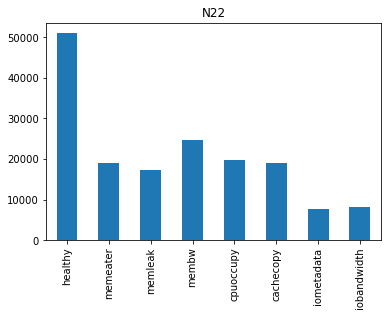

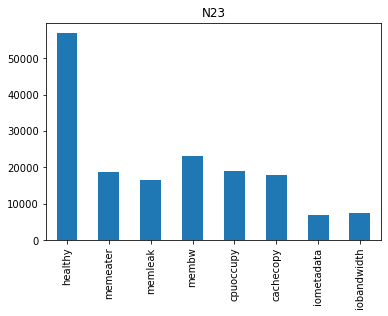

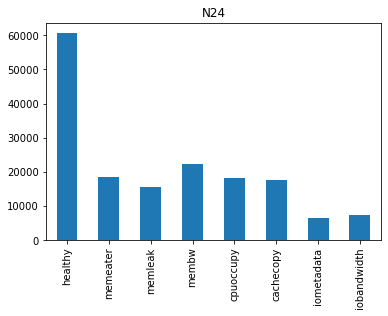

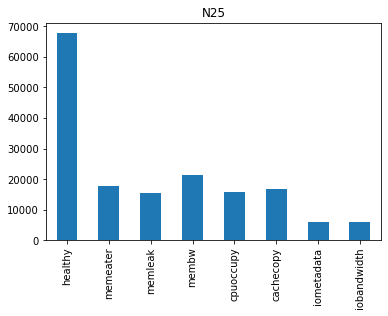

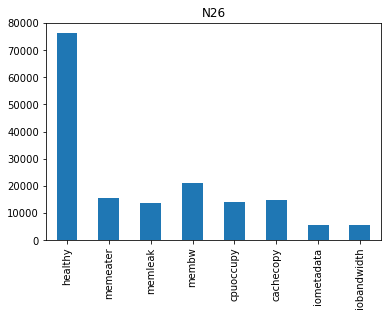

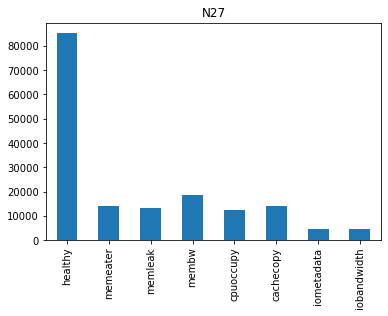

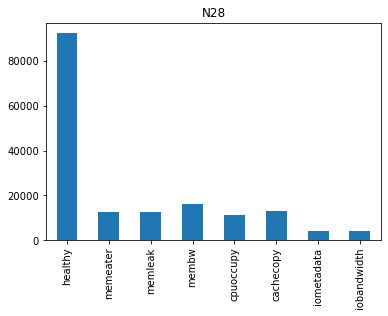

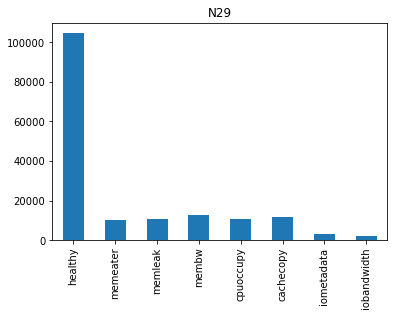

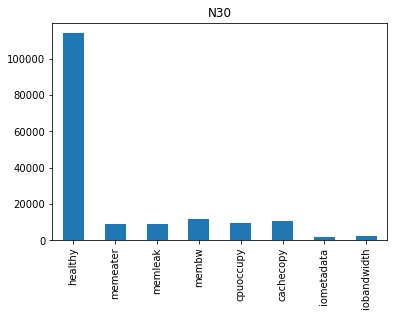

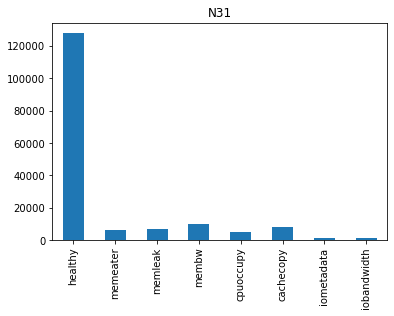

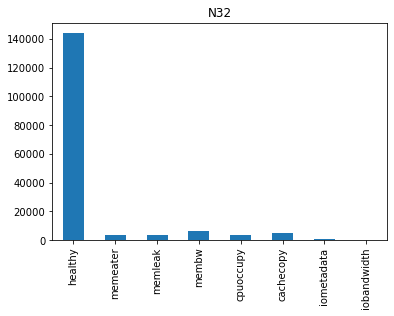

In [13]:
for file_entry in featlist:
    df = pd.read_csv(file_entry, usecols=['label'])
    ax = df['label'].value_counts(sort=False).sort_index().plot( kind="bar")
    ax.set_xticklabels(keys)
    ax.set_title(file_entry.stem.split('_')[0])
    plt.show()

## Feature vectors faults count

In [14]:
for file_entry in featlist:
    df = pd.read_csv(file_entry, usecols=['label'])
    count = df['label'].value_counts(sort=False).sort_index()
    count.index = keys
    print(file_entry.stem.split('_')[0])
    print(count)
    print("##############")

N1
healthy        142570
memeater         3851
memleak          4444
membw            5477
cpuoccupy        4190
cachecopy        4609
iometadata        920
iobandwidth       608
Name: label, dtype: int64
##############
N2
healthy        127165
memeater         7260
memleak          6325
membw            8151
cpuoccupy        7583
cachecopy        7286
iometadata       1985
iobandwidth       914
Name: label, dtype: int64
##############
N3
healthy        111630
memeater         9325
memleak          9573
membw           11764
cpuoccupy        8594
cachecopy        9783
iometadata       2311
iobandwidth      3689
Name: label, dtype: int64
##############
N4
healthy        98884
memeater       12172
memleak        10722
membw          13646
cpuoccupy      11492
cachecopy      11942
iometadata      3730
iobandwidth     4081
Name: label, dtype: int64
##############
N5
healthy        92722
memeater       12897
memleak        11362
membw          15395
cpuoccupy      13074
cachecopy      12421

# CHECKING THE EFFECTS OF RandomUnderSampler ON NODE N1, WITH "MAJORITY" STRATEGY 

In [15]:
from imblearn.under_sampling import RandomUnderSampler

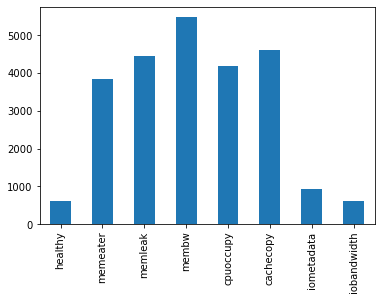

N1
healthy         608
memeater       3851
memleak        4444
membw          5477
cpuoccupy      4190
cachecopy      4609
iometadata      920
iobandwidth     608
Name: 0, dtype: int64


In [16]:
path = "/run/media/vincenzo/HDATA/CovellaScript/multinode/newds_fvectors_mode/N1_11f_60s_1step_mode.csv"

df = pd.read_csv(path)
X = df.drop(['label'], axis=1).to_numpy()
y = df['label'].to_numpy()

rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)

X, y = rus.fit_resample(X, y)

ydf = pd.DataFrame(y)

ax = ydf[0].value_counts(sort=False).sort_index().plot(kind="bar")
ax.set_xticklabels(keys)
plt.show()

count = ydf[0].value_counts(sort=False).sort_index()
count.index = keys
print("N1")
print(count)

**As can be seen, with "majority" undersampling strategy, the majority class gets a number of instances equals to the minority class.**